In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

/home/ubuntu/.virtualenvs/crs-asq-wise2223/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
data = pd.read_csv('imdb_top_1000.csv')
X = np.array(data.Overview)
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [3]:
data = data[['Genre','Overview','Series_Title']]
data.head(10)

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men
5,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,The Lord of the Rings: The Return of the King
6,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Pulp Fiction
7,"Biography, Drama, History","In German-occupied Poland during World War II,...",Schindler's List
8,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Inception
9,Drama,An insomniac office worker and a devil-may-car...,Fight Club


In [4]:
data = data.dropna()
text_data = X
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(text_data, show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/home/ubuntu/.virtualenvs/crs-asq-wise2223/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [5]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-0.055428,-0.091294,0.021461,0.044491,-0.113724
1,-0.048008,-0.270923,-0.116653,0.004096,-0.084741
2,0.306179,-0.144190,0.164514,0.162308,0.133749
3,-0.012209,-0.122011,0.118849,0.092114,-0.161606
4,0.214281,-0.105196,0.246940,-0.020643,0.044551


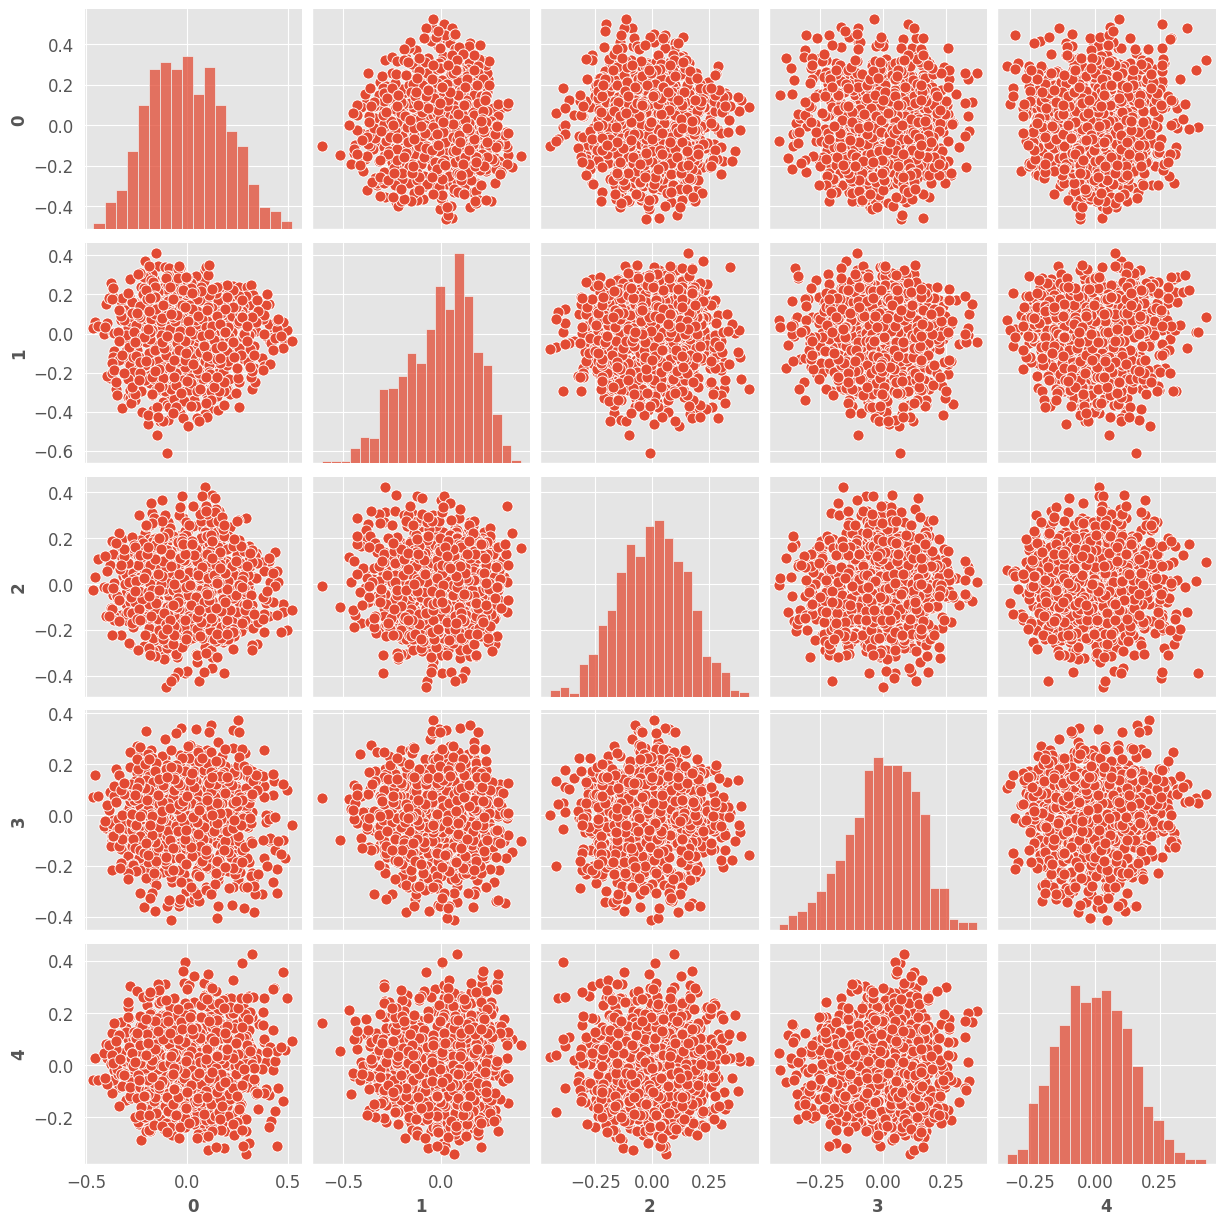

In [6]:
sns.pairplot(pca_data)

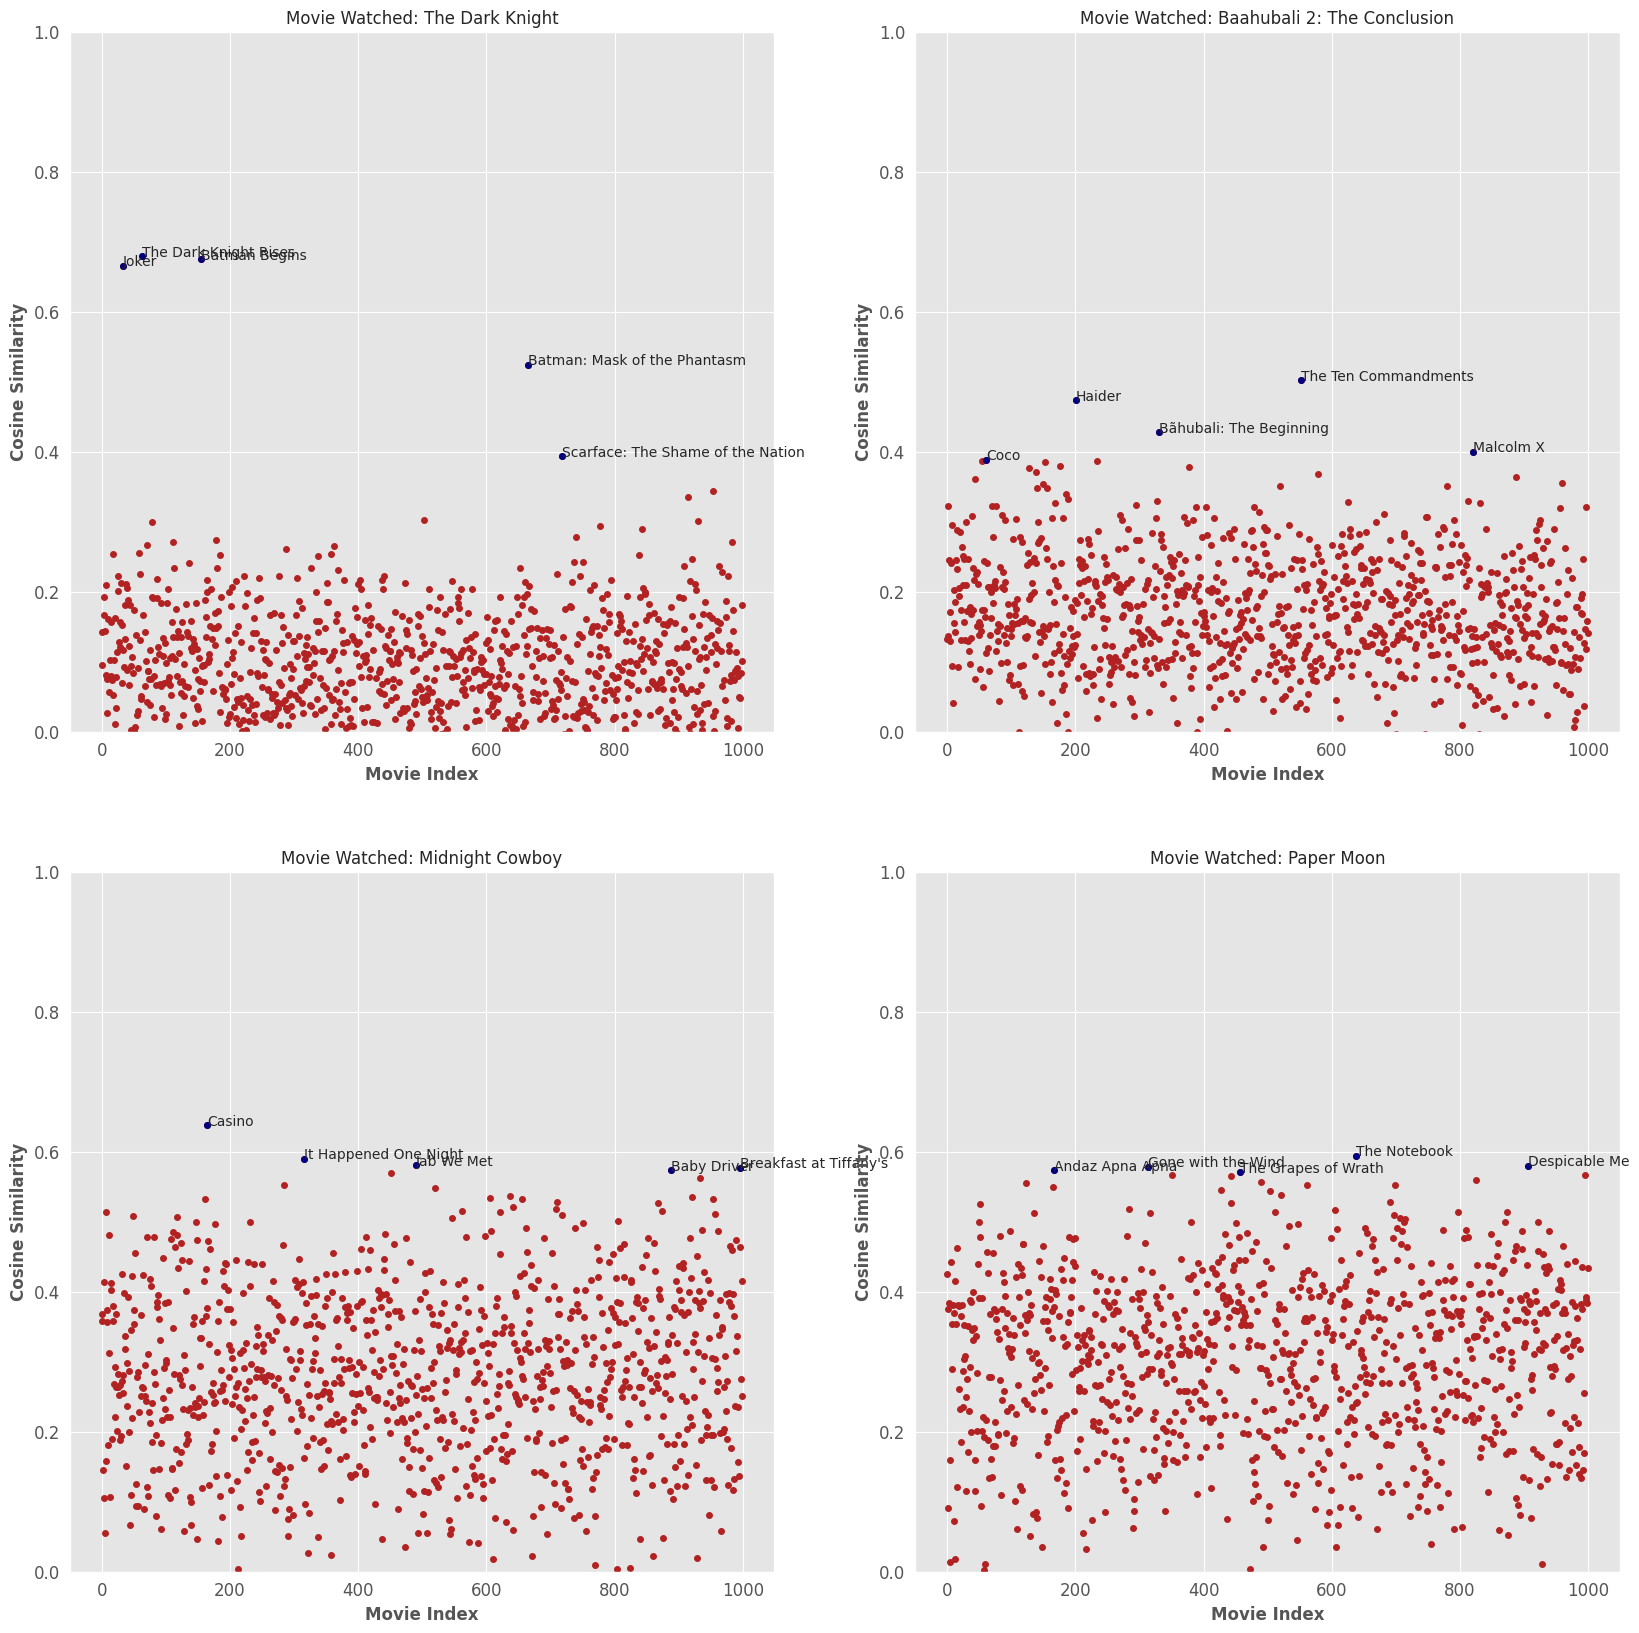

In [16]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
      k=k+1
  if print_recommendation_plots:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result


plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [17]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: The Dark Knight Rises 

The number 2 recommended movie is this one: Batman Begins 

The number 3 recommended movie is this one: Joker 

The number 4 recommended movie is this one: Batman: Mask of the Phantasm 

The number 5 recommended movie is this one: Scarface: The Shame of the Nation 



{'Movies': array(['The Dark Knight Rises', 'Batman Begins', 'Joker',
        'Batman: Mask of the Phantasm',
        'Scarface: The Shame of the Nation'], dtype=object),
 'Index': [63, 155, 33, 665, 718]}

In [9]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 Eight years after the Joker's reign of anarchy, Batman, with the help of the enigmatic Catwoman, is forced from his exile to save Gotham City from the brutal guerrilla terrorist Bane. 

The plot of the number 2 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 3 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 4 recommended movie is this one:
 Batman i

{'Movies': array(['The Dark Knight Rises', 'Batman Begins', 'Joker',
        'Batman: Mask of the Phantasm',
        'Scarface: The Shame of the Nation'], dtype=object),
 'Index': [63, 155, 33, 665, 718]}

In [10]:
give_recommendations(10,True,True)

The watched movie is this one: The Lord of the Rings: The Fellowship of the Ring 

The number 1 recommended movie is this one: The Hobbit: An Unexpected Journey 

The number 1 recommended movie is this one: The Hobbit: The Desolation of Smaug 

The number 1 recommended movie is this one: The Lord of the Rings: The Two Towers 

The number 1 recommended movie is this one: The Lord of the Rings: The Return of the King 

The number 1 recommended movie is this one: Harry Potter and the Deathly Hallows: Part 2 

The plot of the watched movie is this one:
 A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron. 

The plot of the number 1 recommended movie is this one:
 A reluctant Hobbit, Bilbo Baggins, sets out to the Lonely Mountain with a spirited group of dwarves to reclaim their mountain home, and the gold within it from the dragon Smaug. 

The plot of the number 2 recommended movie is this o

{'Movies': array(['The Hobbit: An Unexpected Journey',
        'The Hobbit: The Desolation of Smaug',
        'The Lord of the Rings: The Two Towers',
        'The Lord of the Rings: The Return of the King',
        'Harry Potter and the Deathly Hallows: Part 2'], dtype=object),
 'Index': [618, 609, 13, 5, 226]}

In [11]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [13]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
685,Ghostbusters,Young Frankenstein,The Innocents,Papurika,The Man from Earth,Pink
167,Unforgiven,The Wild Bunch,Sholay,Per un pugno di dollari,Tombstone,The Outlaw Josey Wales
374,Kal Ho Naa Ho,Dil Bechara,Chhichhore,Vikram Vedha,Hana-bi,Låt den rätte komma in
119,Vertigo,Laura,Chinatown,The Maltese Falcon,Chugyeokja,Out of the Past
556,Strangers on a Train,Dial M for Murder,Saw,Match Point,Inside Man,Funny Games


In [15]:
give_recommendations(623,True,True)

The watched movie is this one: Avatar 

The number 1 recommended movie is this one: Platoon 

The number 1 recommended movie is this one: G.O.R.A. 

The number 1 recommended movie is this one: Predator 

The number 1 recommended movie is this one: Taegukgi hwinalrimyeo 

The number 1 recommended movie is this one: From Here to Eternity 

The plot of the watched movie is this one:
 A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home. 

The plot of the number 1 recommended movie is this one:
 Chris Taylor, a neophyte recruit in Vietnam, finds himself caught in a battle of wills between two sergeants, one good and the other evil. A shrewd examination of the brutality of war and the duality of man in conflict. 

The plot of the number 2 recommended movie is this one:
 A slick young Turk kidnapped by extraterrestrials shows his great « humanitarian spirit » by outwitting the evil comma

{'Movies': array(['Platoon', 'G.O.R.A.', 'Predator', 'Taegukgi hwinalrimyeo',
        'From Here to Eternity'], dtype=object),
 'Index': [268, 366, 677, 236, 997]}